In [2]:
# Importing necessary libraries for data analysis and visualization

import pandas as pd # for data manipulation and analysis
import numpy as np # For numerical operations and mathematical functions
import matplotlib.pyplot as plt # For creating static visualization
import seaborn as sns # For creating statistical graphics and enhancing plot

In [3]:
from datetime import datetime

In [41]:
# Loading dataset from csv file into a pandas dataframe
df = pd.read_csv("Daily_Global_Stock_Market_Indicators.csv")

# Checking the first five rows of the datagrame
df.head()

,Date,Index_Name,Country,Open,High,Low,Close,Volume,Daily_Change_Percent
0,2020-01-01,S&P 500,USA,15607.06,16277.38,15427.47,16057.78,36788921,2.89
1,2020-01-01,NASDAQ Composite,USA,7083.79,7343.64,6461.54,6641.87,22249687,-6.24
2,2020-01-01,Dow Jones,USA,26384.65,26601.25,25659.50,25941.06,4344769,-1.68
3,2020-01-01,FTSE 100,UK,8091.17,8182.45,7617.15,7774.58,44250411,-3.91
4,2020-01-01,Nikkei 225,Japan,1899.43,2044.17,1885.43,1924.21,22498555,1.30


In [42]:
# checking last 5 rows of the dataframe
df.tail(5)

,Date,Index_Name,Country,Open,High,Low,Close,Volume,Daily_Change_Percent
18265,2024-12-31,Hang Seng,Hong Kong,1718.84,2027.75,1639.67,2017.82,47658304,17.39
18266,2024-12-31,DAX,Germany,1513.68,1933.41,1485.06,1921.63,13456944,26.95
18267,2024-12-31,CAC 40,France,8944.27,9018.54,8608.51,8737.25,36520735,-2.31
18268,2024-12-31,SSE Composite,China,14674.14,15131.30,14415.31,14888.37,43850831,1.46
18269,2024-12-31,KSE 100,Pakistan,11151.86,11574.65,10995.48,11387.51,15879687,2.11


In [43]:
# Checking the column name
df.columns

Index(['Date', 'Index_Name', 'Country', 'Open', 'High', 'Low', 'Close',
       'Volume', 'Daily_Change_Percent'],
      dtype='object')

In [44]:
# Checking the information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  18270 non-null  object 
 1   Index_Name            18270 non-null  object 
 2   Country               18270 non-null  object 
 3   Open                  18270 non-null  float64
 4   High                  18270 non-null  float64
 5   Low                   18270 non-null  float64
 6   Close                 18270 non-null  float64
 7   Volume                18270 non-null  int64  
 8   Daily_Change_Percent  18270 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [45]:
# Checking the shape of the dataframe
df.shape

(18270, 9)

In [46]:
# statistical summary of the dataframe
df.describe()

,Open,High,Low,Close,Volume,Daily_Change_Percent
count,18270.000000,18270.000000,18270.000000,18270.000000,1.827000e+04,18270.000000
mean,20442.806842,20718.693753,20166.620486,20442.378464,2.560834e+07,0.006006
std,11257.356569,11260.177506,11258.553850,11261.448439,1.414837e+07,4.534069
min,1000.650000,1018.520000,349.960000,622.950000,1.005194e+06,-44.320000
25%,10743.355000,11011.495000,10471.052500,10736.957500,1.336530e+07,-1.250000
50%,20398.855000,20685.665000,20116.395000,20394.740000,2.573716e+07,-0.010000
75%,30208.945000,30470.575000,29938.702500,30186.750000,3.778344e+07,1.230000
max,39990.310000,40680.180000,39985.490000,40474.780000,4.999802e+07,45.690000


In [47]:
# statistical summary of categorical columns
df.describe(include='object')

,Date,Index_Name,Country
count,18270,18270,18270
unique,1827,10,8
top,2020-01-01,S&P 500,USA
freq,10,1827,5481


In [48]:
# Checking whether the dataframe has missing value or not
df.isnull().sum()

Date                    0
Index_Name              0
Country                 0
Open                    0
High                    0
Low                     0
Close                   0
Volume                  0
Daily_Change_Percent    0
dtype: int64

Outliner detection

In [49]:
# Checking the min, mean, median, max values of numerical columns to identify the ouliners

num_cols = df.select_dtypes(include=['number']).columns
stat = pd.DataFrame({
    'Min': df[num_cols].min(),
    'Mean': df[num_cols].mean(),
    'Median': df[num_cols].median(),
    'Max': df[num_cols].max()
})

stat = stat.applymap(lambda x: f"{x:.2f}")
stat

C:\Users\DELL\AppData\Local\Temp\ipykernel_14600\1013141871.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  stat = stat.applymap(lambda x: f"{x:.2f}")


,Min,Mean,Median,Max
Open,1000.65,20442.81,20398.85,39990.31
High,1018.52,20718.69,20685.67,40680.18
Low,349.96,20166.62,20116.40,39985.49
Close,622.95,20442.38,20394.74,40474.78
Volume,1005194.00,25608343.26,25737160.50,49998017.00
Daily_Change_Percent,-44.32,0.01,-0.01,45.69


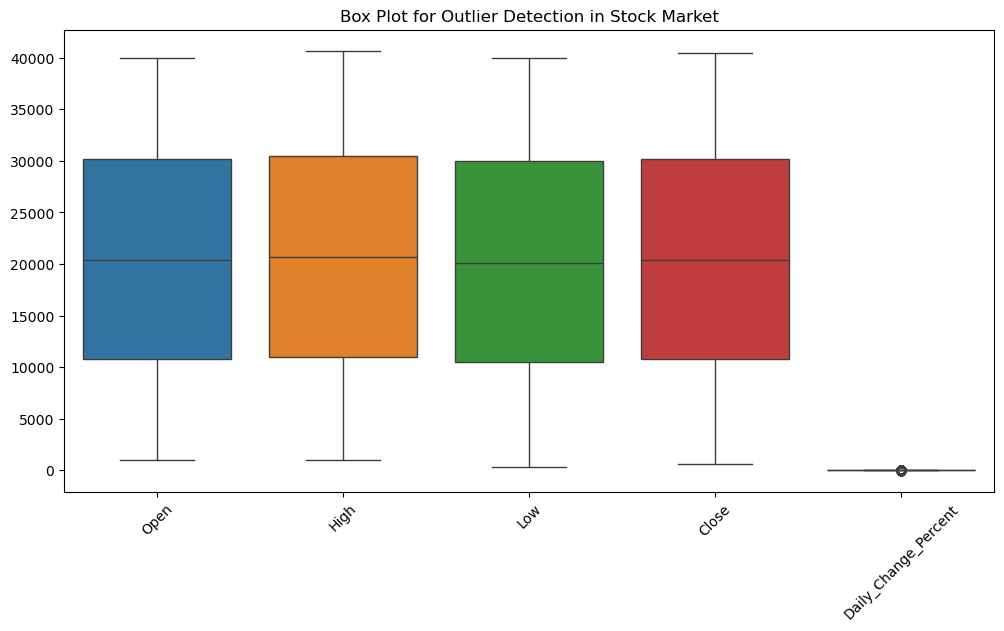

In [50]:
# Selecting numerical columns for outlier detection
cols = ['Open', 'High', 'Low', 'Close', 'Daily_Change_Percent']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[cols])
plt.title("Box Plot for Outlier Detection in Stock Market")
plt.xticks(rotation=45)
plt.show()

In [52]:
# Selecting column
data = df['Daily_Change_Percent']

# Calculate Q1, Q3, and IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Defining fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Finding outliers
outliers = []
for value in data:
    if value < lower_fence or value > upper_fence:
        outliers.append(value)

len(outliers), outliers[:10]

(1905, [-6.24, 5.72, -6.32, -6.51, -19.44, 5.9, -6.97, -29.33, 7.47, -11.83])

In [53]:
lower_fence, upper_fence

(-4.97, 4.949999999999999)

In [54]:
# Clipping outliers (best for stock data)
# extreme values are capped while keeping the data size unchanged
df['Daily_Change_Percent'] = df['Daily_Change_Percent'].clip(lower_fence, upper_fence)

In [55]:
df.sample(20)

,Date,Index_Name,Country,Open,High,Low,Close,Volume,Daily_Change_Percent
2432,2020-08-31,Dow Jones,USA,11634.41,11899.30,11112.76,11325.16,40030865,-2.66
1613,2020-06-10,FTSE 100,UK,16353.59,16371.96,15868.19,16045.47,21794857,-1.88
731,2020-03-14,NASDAQ Composite,USA,29587.14,29804.80,29413.49,29763.27,30998127,0.60
3091,2020-11-05,NASDAQ Composite,USA,15522.29,15580.79,15359.56,15393.86,26468269,-0.83
15773,2024-04-26,FTSE 100,UK,24869.84,24984.04,24519.01,24616.63,5048784,-1.02
8867,2022-06-05,CAC 40,France,2794.44,3289.98,2691.80,3185.28,12437237,4.95
16377,2024-06-25,CAC 40,France,26495.17,27034.17,26251.32,26803.37,31653767,1.16
1346,2020-05-14,DAX,Germany,6568.64,6854.15,6362.16,6458.07,38465683,-1.68
12818,2023-07-05,SSE Composite,China,37787.95,37892.16,37692.42,37756.57,10665608,-0.08
9402,2022-07-29,Dow Jones,USA,30198.24,30355.53,30122.72,30234.28,34618105,0.12


In [56]:
print("\nUnique Index Names:")
print(df['Index_Name'].unique())


Unique Index Names:
['S&P 500' 'NASDAQ Composite' 'Dow Jones' 'FTSE 100' 'Nikkei 225'
 'Hang Seng' 'DAX' 'CAC 40' 'SSE Composite' 'KSE 100']


In [57]:
print("\nUnique Countries:")
print(df['Country'].unique())


Unique Countries:
['USA' 'UK' 'Japan' 'Hong Kong' 'Germany' 'France' 'China' 'Pakistan']


In [58]:
# Converting Date to datetime
df['Date'] = pd.to_datetime(df['Date'])
print(f"\nDate Range: {df['Date'].min()} to {df['Date'].max()}")


Date Range: 2020-01-01 00:00:00 to 2024-12-31 00:00:00


In [59]:
# Analyzing Daily Performance Trends
print("\n" + "="*50)
print("1. DAILY PERFORMANCE ANALYSIS")
print("="*50)


1. DAILY PERFORMANCE ANALYSIS


In [60]:
# Calculating summary statistics for daily changes
daily_change_stats = df.groupby('Index_Name')['Daily_Change_Percent'].agg([
    'mean', 'median', 'std', 'min', 'max', 'count'
]).round(2)

print("\nDaily Change Statistics by Index:")
print()
print(daily_change_stats.sort_values('mean', ascending=False))


Daily Change Statistics by Index:

                  mean  median   std   min   max  count
Index_Name                                             
KSE 100           0.06   -0.02  2.27 -4.97  4.95   1827
FTSE 100          0.04    0.05  2.36 -4.97  4.95   1827
NASDAQ Composite  0.04    0.06  2.33 -4.97  4.95   1827
CAC 40            0.03   -0.00  2.24 -4.97  4.95   1827
S&P 500           0.01    0.05  2.33 -4.97  4.95   1827
Hang Seng        -0.01   -0.05  2.34 -4.97  4.95   1827
DAX              -0.02    0.02  2.23 -4.97  4.95   1827
Nikkei 225       -0.06    0.00  2.28 -4.97  4.95   1827
SSE Composite    -0.06   -0.06  2.28 -4.97  4.95   1827
Dow Jones        -0.12   -0.16  2.28 -4.97  4.95   1827


In [18]:
# Identifying volatile markets
print("\n" + "="*50)
print("2. MARKET VOLATILE ANALYSIS")
print("="*50)


2. MARKET VOLATILE ANALYSIS


In [61]:
# Calculating volatility
volatility= df.groupby(['Index_Name', 'Country'])['Daily_Change_Percent'].std().reset_index()
volatility= volatility.rename(columns={'Daily_Change_Percent': 'Volatility'})
volatility= volatility.sort_values('Volatility', ascending=False).reset_index()

print("\nTop 10 most volatile markets:")
print()
print(volatility)


Top 10 most volatile markets:

   index        Index_Name    Country  Volatility
0      3          FTSE 100         UK    2.359105
1      4         Hang Seng  Hong Kong    2.337334
2      8           S&P 500        USA    2.333010
3      6  NASDAQ Composite        USA    2.332252
4      2         Dow Jones        USA    2.282721
5      9     SSE Composite      China    2.281270
6      7        Nikkei 225      Japan    2.277374
7      5           KSE 100   Pakistan    2.272504
8      0            CAC 40     France    2.238817
9      1               DAX    Germany    2.228535
